# <font style="color:rgb(50,120,229)">Overview</font>
In this section, we will go over some basic mathematical operations. The most basic operations like addition and multiplication are very heavily used in all image processing and computer vision applications. We will take a few examples to illustrate the concepts.

We will also look at a few pitfalls in OpenCV which one should be aware of while doing mathematical operations on matrices.

Lot of CV practitioners have a difficult time with arithmetic operations since they don't take care of the data types they are dealing with fully and waste a lot of time on debugging trivial bugs.

We will look into two simple operations on images that change the brightness and contrast of the image which use the arithmetic operations like addition and multiplication respectively.

# <font style = "color:rgb(50,120,229)">Datatype Conversion</font>
Before we get into any mathematical operations, it is very important to understand the data types used and how to convert from one to another.

As we saw in previous modules, an image is represented as a numpy array once it's read using **`cv2.imread`** function. The default datatype of this object is **unsigned integer** (**8 bits**). For most Arithmentic operations like multiplication or division, we need to convert the array type to floating point with each pixel having **16, 32 or 64 bits** of data. This helps prevent overflow while working with the images.

Most of the time we dont need to work using float64 and float32 is enough for most image processing operations ( even float16 )

In [1]:
# Import libraries
import cv2
import numpy as np
from dataPath import DATA_PATH
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read image
image = cv2.imread(os.path.join(DATA_PATH,"images/boy.jpg"))

In [3]:
scalingFactor = 1/255.0

# Convert unsigned int to float
image = np.float32(image)
# Scale the values so that they lie between [0,1]
image = image * scalingFactor

The scale or the scaling factor reduces the range of **0-255** to **0-1**, hence all the floating point numbers now range between 0-1. When we convert back to unsigned integer we use the **reciprocal** of the scaling factor and the range is converted from 0-1 to 0-255.

In [4]:
#Convert back to unsigned int
image = image * (1.0/scalingFactor)
image = np.uint8(image)

# <font style="color:rgb(50,120,229)">Contrast Enhancement</font>
Many definitions of contrast exist in literature. Without going into the gory details, roughly speaking it is the difference in intensity between the brightest and darkest regions of a given image. Higher the difference, higher is the contrast. The maximum contrast of an image is also known as **Dynamic Range**. In an image with good contrast, objects are easily discernible.

One of the easiest ways to improve contrast of an image is Intensity Scaling

In this approach, a scale factor ( $\alpha$ ) is multiplied with intensity values of all the pixels. Given below is the code snippet to do the same. Intensity scaling is represented by the following equation 

 $$
 I_o = \alpha I
 $$


## <font style="color:rgb(50,120,229)">Code for Contrast Enhancement</font>

In the code below, we will apply the above mentioned formulas to get contrast enhanced images.

We will increase the contrast by 30%.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..331.5].


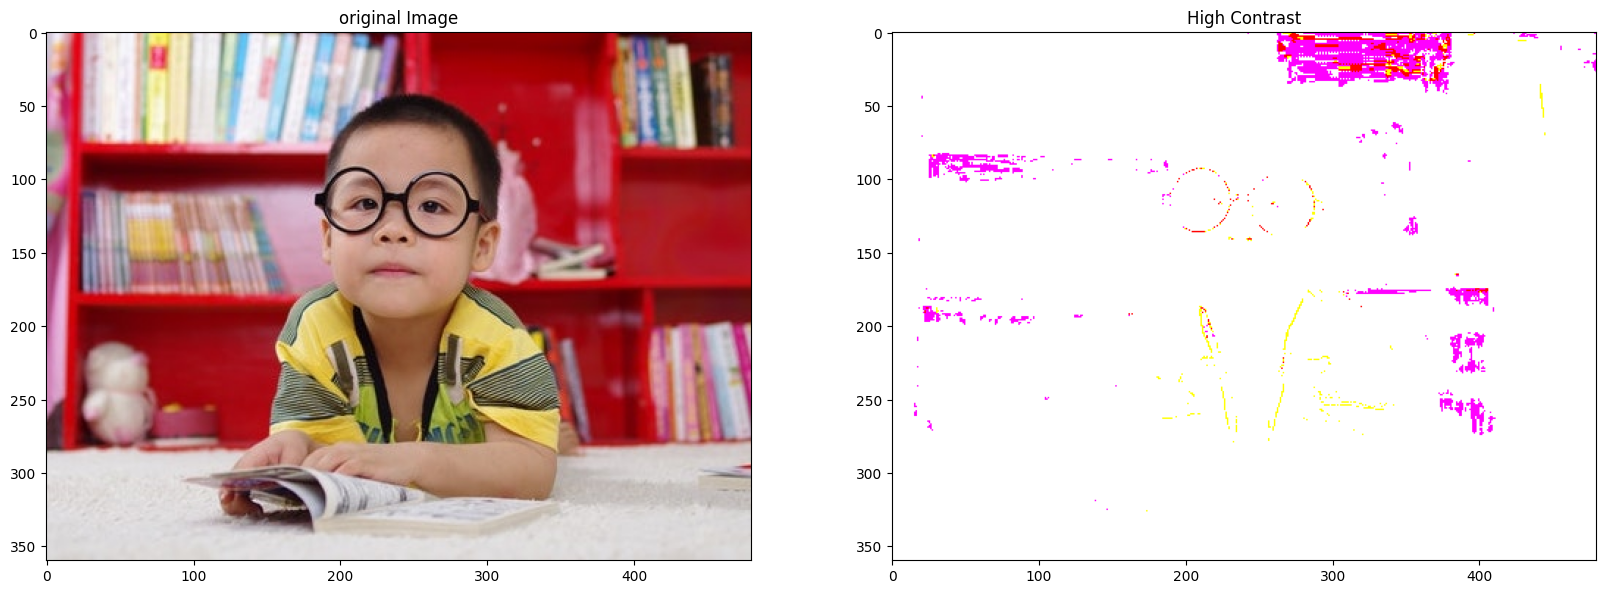

In [9]:
constrastPercentage = 30

# Multiply with scaling factor to increase contrast
contrastHigh = image * (1 + constrastPercentage / 100)

# Display the outputs
plt.figure(figsize=[20,20])
plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("original Image");
plt.subplot(122);plt.imshow(contrastHigh[...,::-1]);plt.title("High Contrast");

## <font style="color:rgb(50,120,229)">What's wrong?</font>
Why did these simple operations gave such undesirable results? To answer that, let us do a quick check of the image properties.


In [10]:
print("Original Image Datatype : {}".format(image.dtype))
print("Contrast Image Datatype : {}".format(contrastHigh.dtype))

print("Original Image Highest Pixel Intensity : {}".format(image.max()))
print("Contrast Image Highest Pixel Intensity : {}".format(contrastHigh.max()))

Original Image Datatype : uint8
Contrast Image Datatype : float64
Original Image Highest Pixel Intensity : 255
Contrast Image Highest Pixel Intensity : 331.5


### <font style = "color:rgb(8,133,37)">Issue with Contrast Enhancement code </font>
The white display in case of contrastHigh is more of a display issue. Display functions expect the images to be in either of these 2 formats:
1. If the image is in float datatype, then the range should be [0,1]. Anything above 1 is considered as white.
1. If the image is in int datatype, then the range should be [0,255]. Anything above 255 is considered as white.

### <font style = "color:rgb(8,133,37)">Solution </font>
We can see that the datatype of contrastHigh is float and the max value is 331.5. This means that in order to get rid of this display problem, we can consider the above 2 points and make the image conform to any of the valid formats. So, to get rid of the problem, we can do the following:
1. **`Clip`** or **`Normalize`** the intensity values to **`0 ~ 255`** and change the data type to **`uint8`**.
1. If you want to keep the image in float format, then **`Normalize`** the instensity values so that it lies in **`[0,1]`.**

In [ ]:
constrastPercentage = 30

# Clip the values to [0,255] and change it back to uint8 for display
contrastImage = image + (1 + constrastPercentage / 100)
clippedContrastImage = np.clip(contrastImage, 0, 255)
contrastHighClippedUint8 = np.uint8(clippedContrastImage)